In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.model_selection import train_test_split, KFold

In [2]:
df = pd.read_pickle('data/sf_inspection.pkl')

In [3]:
df.head(2)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,94129,94130,94131,94132,94133,94134,94143,94158,95105,p10_36
0,1757,Dar Bar Pakistani/Indian Cusine,1412 Polk St,San Francisco,CA,94109,37.789784,-122.420455,"(37.789784, -122.420455)",NaN,...,0,0,0,0,0,0,0,0,0,11
1,4864,DRAGON CITY BAKERY & CAFE,2367 MISSION St,San Francisco,CA,94110,37.759174,-122.419066,"(37.759174, -122.419066)",1.415583e+10,...,0,0,0,0,0,0,0,0,0,13


## Assign average values to the missing longitude and latitude values

In [4]:
mask = df['business_latitude'].isnull().values

In [5]:
sum_latitude = df['business_latitude'].loc[~mask].values.astype(float).sum()
len_latitude = len(df['business_latitude'].loc[~mask].values)
avg_latitude = sum_latitude/len_latitude
avg_latitude

37.7733176329152

In [6]:
sum_longitude = df['business_longitude'].loc[~mask].values.astype(float).sum()
len_longitude = len(df['business_longitude'].loc[~mask].values)
avg_longitude = sum_longitude/len_longitude
avg_longitude

-122.425022521273

In [7]:
df.loc[mask,'business_latitude'] = avg_latitude
df.loc[mask,'business_longitude'] = avg_longitude

## 2-dim plot

In [8]:
# get rid of two wrong geo locations
mask_80 = df['business_longitude'].values.astype(float) > -80.
df.loc[mask_80]

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,94129,94130,94131,94132,94133,94134,94143,94158,95105,p10_36


In [9]:
df2 = df.loc[~mask_80]
len(df2)

4689

In [10]:
df2['business_longitude'].values > -122.375

array([False, False, False, ..., False, False, False])

In [11]:
a = df2['business_longitude'].values
b = df2['business_latitude'].values

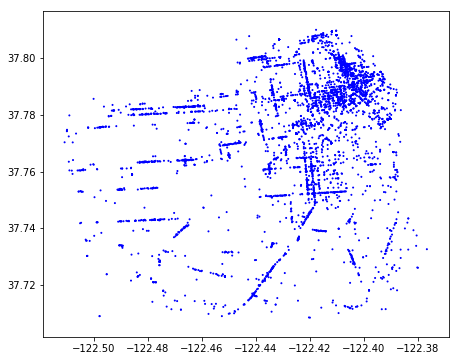

In [12]:
#fig = plt.figure
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)

#ax=fig.add
# a = np.random.randint(1000, size=50)
# b = np.random.randint(1000, size=50)
col = np.where((a+b) % 2== 0, 'r','b')
ax1.scatter(a, b, c=col, s=1)

In [41]:
x = np.array(a)
y = np.array(b)
ylabel = df2['y_label'].values

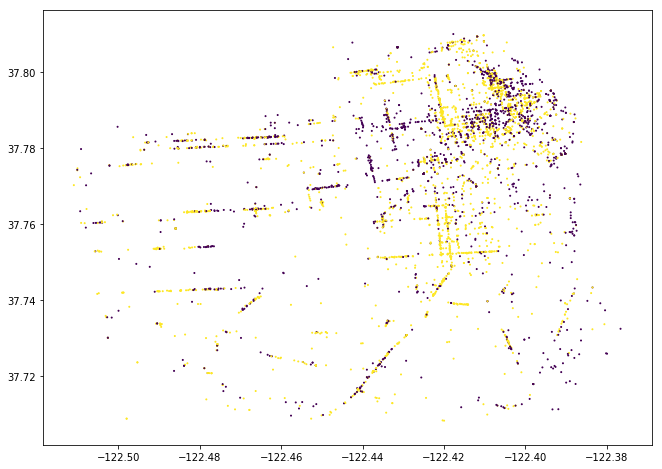

In [45]:
fig = plt.figure(figsize = (24,8))
ax1 = fig.add_subplot(121)
ax1.scatter(x,y, c=ylabel, s=1)

In [15]:
y = df2['y_label']
X = df2[['p10_12', 'p13_18', 'p19_24', 'p25_36', '94013', '94014', '94080', '94101', '94102', '94103', '94104',
       '94105', '94107', '94108', '94109', '94110', '94111', '94112', '94114',
       '94115', '94116', '94117', '94118', '94120', '94121', '94122', '94123',
       '94124', '94127', '94129', '94130', '94131', '94132', '94133', '94134',
       '94143', '94158']]

In [16]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.25, random_state=38)

In [17]:
X_train, X_validation, y_train, y_validation = train_test_split(X_tr, y_tr, test_size=0.25, random_state=28)

In [18]:
kscore = []
for n in range(10,200, 5):
    K_means = cluster.KMeans(n_clusters=n)
    K_means.fit(X_train)
    asum = sum(K_means.labels_ == y_train)/len(y_train)
    kscore.append(asum)
    

In [19]:
# print(K_means.labels_[::10])
# print(y_train[::10])

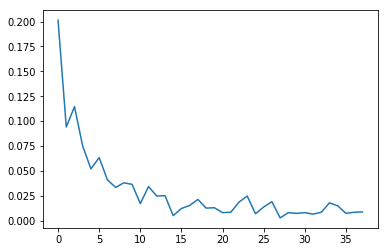

In [20]:
plt.plot(kscore)

## Find 60 centroids and their members

In [29]:
# number of clusters = 60 (twice number of zip codes)
K_means = cluster.KMeans(n_clusters=60)
K_means.fit(X_train)
sum(K_means.labels_ == y_train)/len(y_train)    

0.01478953356086462

In [36]:
ccenters = K_means.cluster_centers_

In [40]:
ccenters[0]

array([-1.11022302e-16,  4.76086957e+00,  2.17391304e-02,  3.93478261e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.69565217e-02,  8.69565217e-02,  1.04083409e-17,  2.08166817e-17,
        6.52173913e-02,  4.34782609e-02,  8.69565217e-02,  4.34782609e-02,
        2.17391304e-02,  2.17391304e-02,  4.34782609e-02,  6.52173913e-02,
        0.00000000e+00,  4.34782609e-02,  1.08695652e-01, -2.71050543e-19,
        6.52173913e-02,  2.17391304e-02,  2.08166817e-17,  4.34782609e-02,
       -3.46944695e-18,  0.00000000e+00,  0.00000000e+00,  2.17391304e-02,
        2.17391304e-02,  1.08695652e-01,  1.73472348e-17, -2.71050543e-19,
       -2.16840434e-18])

In [38]:
for center in ccenters:
    print(len(center))

37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
